In [15]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Monte_Carlo_Simulations_in_Python/datasets/'
import pandas as pd


In [1]:
# exercise 01

"""
Deterministic simulation

The year 2022 saw record high inflation. There are many ways to think about what inflation in the future will be. In this exercise, you'll attempt to estimate future inflation using a deterministic model.

Recall that deterministic models do not include any randomness and allow you to calculate the outcome of a future event exactly. In the next exercise, you'll use a Monte Carlo simulation, which is stochastic. Throughout these exercises, consider which simulation—deterministic or stochastic—is more appropriate for estimating inflation.

For this example, assume the inflation rate was 8.6% in 2022 and that there is a steady increase of 2% for inflation in each year following. Using these assumptions, what will the inflation rate be in 2050?
"""

# Instructions

"""
Using the deterministic_inflation() function defined in the editor, estimate inflation in 2050.
"""

# solution

def deterministic_inflation(year, yearly_increase_percent):
    inflation_rate = 8.6
    inflation_rate = inflation_rate*((100+yearly_increase_percent)/100)**(year-2022)
    return(inflation_rate)

# Print the deterministic simulation results
print(deterministic_inflation(2050,2))

#----------------------------------#

# Conclusion

"""
Congratulations! You've forecasted inflation using a deterministic simulation. You get exact and deterministic results from deterministic simulations. In the next exercise, you'll use a Monte Carlo simulation to take some randomness into consideration!!
"""

14.97280817309578


"\nCongratulations! You've forecasted inflation using a deterministic simulation. You get exact and deterministic results from deterministic simulations. In the next exercise, you'll use a Monte Carlo simulation to take some randomness into consideration!!\n"

In [2]:
# exercise 02

"""
Stochastic nature of Monte Carlo simulation

In the previous exercise, you modeled information deterministically. You'll now attempt to estimate future inflation with a stochastic model, using a Monte Carlo simulation.

Recall that stochastic models simulate randomness in variables by using sampling. This randomness means that each simulation will likely arrive at a different expected outcome, even if the inputs are the same. We saw this in the video by running Monte Carlo simulations with different seeds.

In this exercise, assume 8.6% inflation in 2022 and a stochastic increase of 1%, 2%, or 3% each year over the previous year (with equal probabilities of 1%, 2%, or 3%) for the following years. What will the inflation rate look like in 2050 under these assumptions?

The random package has already been imported for you as random.
"""

# Instructions

"""


    Use random.randint() to generate a random integer that represents the three possibilities for the yearly_increase in inflation each year: 1, 2, or 3 percent.
---


    Using monte_carlo_inflation(), simulate the inflation rate for the year 2050 with a seed of 1234.
    Using monte_carlo_inflation(), simulate the inflation rate for the year 2050 with a seed of 34228.

"""

# solution

import random
def monte_carlo_inflation(year, seed):
    random.seed(seed)
    inflation_rate = 8.6
    yearly_increase = random.randint(1, 3)
    for i in range(year - 2022):
        inflation_rate = inflation_rate*((100 + yearly_increase)/100)
    return(inflation_rate)
  
# Simulate the inflation rate for the year 2050 with a seed of 1234
print(monte_carlo_inflation(2050,1234))

# Simulate the inflation rate for the year 2050 with a seed of 34228
print(monte_carlo_inflation(2050,34228))

#----------------------------------#

# Conclusion

"""
Congratulations on successfully running the simulation. You saw a difference in inflation of 5% by varying the seed, due to the stochastic nature of Monte Carlo simulations. What if you ran the inflation many times and took the average? In the next exercise, you'll see the Law of Large Numbers in action!
"""

14.972808173095785
19.676178011340454


"\nCongratulations on successfully running the simulation. You saw a difference in inflation of 5% by varying the seed, due to the stochastic nature of Monte Carlo simulations. What if you ran the inflation many times and took the average? In the next exercise, you'll see the Law of Large Numbers in action!\n"

In [4]:
# exercise 03

"""
The Law of Large Numbers

You learned in the previous exercise that due to the stochastic nature of Monte Carlo simulations, each simulation result can be very different. In this exercise, you'll leverage the Law of Large Numbers to simulate inflation in 2050 based on the average of a large number of simulations.

The monte_carlo_inflation() function you wrote in the previous exercise is available for use. As a reminder, this is the function code:

def monte_carlo_inflation(year, seed):
    random.seed(seed)
    inflation_rate = 8.6
    yearly_increase = random.randint(1, 3)
    for i in range(year - 2022):
        inflation_rate = inflation_rate * ((100 + yearly_increase)/100)
    return(inflation_rate)

The numpy and random packages have been imported for you.
"""

# Instructions

"""


    Calculate the average of 1,000 simulations where a seed between 0 and 20,000 is randomly chosen each time.
    Calculate the average of 10,000 simulations where a seed between 0 and 20,000 is randomly chosen each time.

"""

# solution
import numpy as np
# Calculate the average of 1,000 simulation results with a seed between 0 and 20000
rates_1 = []
for i in range(1000):
    seed = random.randint(0, 20000)
    rates_1.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_1))

# Calculate the average of 10,000 simulation results with a seed between 0 and 20000
rates_2 = []
for i in range(10000):
    seed = random.randint(0, 20000)
    rates_2.append(monte_carlo_inflation(2050, seed))
print(np.mean(rates_2))

#----------------------------------#

# Conclusion

"""
Well done! With a large number of simulations, you can see the average inflation rate is now quite consistent. Contrary to what you saw in the last exercise, on average, the difference between the two simulations is now less than 1%!
"""

16.543733699069502
16.540441340182735


'\nWell done! With a large number of simulations, you can see the average inflation rate is now quite consistent. Contrary to what you saw in the last exercise, on average, the difference between the two simulations is now less than 1%!\n'

In [5]:
# exercise 04

"""
Sampling with replacement

Bootstrapping is great for calculating confidence intervals for means; you'll now practice doing just that!

nba_weights contains the weights of a group of NBA players in kilograms:

nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 
               100.3, 101.0, 98.0, 97.4]

You are interested in calculating the 95% confidence interval of the mean weight of NBA players using this list.

The following have been imported for you: random, and numpy as np.
"""

# Instructions

"""


    Use random.choices() to sample nine heights from the list 1,000 times, with replacement.
    Calculate the mean and 95% confidence interval for your simulation results, assigning the lower end of the confidence interval to lower and the upper end to upper.

"""

# solution

nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 
               100.3, 101.0, 98.0, 97.4]

simu_weights = []

# Sample nine values from nba_weights with replacement 1000 times
for i in range(1000):
    bootstrap_sample = random.choices(nba_weights, k=9)
    simu_weights.append(np.mean(bootstrap_sample))

# Calculate the mean and 95% confidence interval of the mean for your results
mean_weight = np.mean(simu_weights)
upper = np.quantile(simu_weights, 0.975)
lower = np.quantile(simu_weights, 0.025)
print(mean_weight, lower, upper)

#----------------------------------#

# Conclusion

"""
Great! You have succeeded in simulating the results and you can see that the mean value lies around the middle of the 95% confidence interval!
"""

98.74893333333334 97.80000000000001 99.72222222222223


'\nGreat! You have succeeded in simulating the results and you can see that the mean value lies around the middle of the 95% confidence interval!\n'

/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


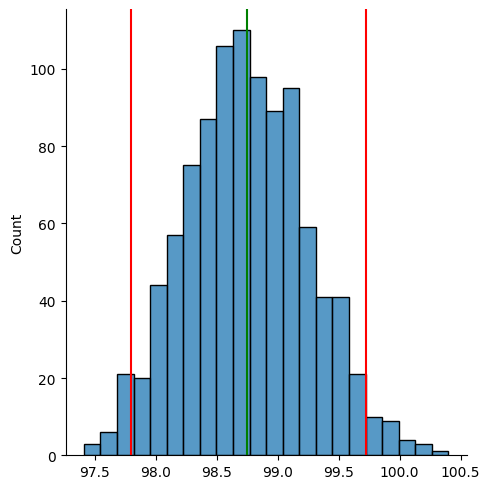

'\nGreat! You can see that the mean value lies around the middle of the 95% confidence interval as well as the overall distribution of the simulated data!\n'

In [6]:
# exercise 05

"""
Visualization of resampling results

Now you'll visualize the results of your simulation from the previous exercise! You'll continue working with nba_weights, which contains the weights of a group of NBA players in kilograms:

nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 
               100.3, 101.0, 98.0, 97.4]

Here is your simulation code from the previous exercise:

simu_weights = []
for i in range(1000):
    bootstrap_sample = random.choices(nba_weights, k=9)
    simu_weights.append(np.mean(bootstrap_sample))
mean_weight = np.mean(simu_weights)
upper = np.quantile(simu_weights, 0.975)
lower = np.quantile(simu_weights, 0.025)
print(mean_weight, lower, upper)

The simu_weights list you generated in the last exercise is loaded for you. Similarly, mean_weight, lower and upper are already defined as the mean and 2.5% and 97.5% quantile values for your confidence interval.

The following packages have already been loaded for you: random, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Use sns.displot() to plot the distribution of the simulated weights.
    Use plt.axvline() to plot two vertical lines for the 95% confidence interval (plot lower followed by upper) in red, and the mean in green.

"""

# solution

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the simulated weights
sns.displot(simu_weights)

# Plot vertical lines for the 95% confidence intervals and mean
plt.axvline(lower, color="red")
plt.axvline(upper, color="red")
plt.axvline(mean_weight, color="green")
plt.show()

#----------------------------------#

# Conclusion

"""
Great! You can see that the mean value lies around the middle of the 95% confidence interval as well as the overall distribution of the simulated data!
"""

In [10]:
# exercise 06

"""
Permutation practice

Are NBA players heavier than US adult males? You are now interested in calculating the 95% confidence interval of the mean difference (in kilograms) between NBA players and US adult males. You'll use the two lists provided.

Permutation is great when testing for difference, so that's the resampling method you'll use here!

nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]

Note that each of the above lists has 13 weights listed.

The following have been imported for you: random, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Define all_weights as a list which contains the values from both nba_weights and us_adult_weights.
    Perform the permutation on all_weights using np.random.permutation().
    Assign the first 13 permutated samples to perm_nba and the remaining 13 to perm_adult.

"""

# solution
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]
# Define all_weights
all_weights = nba_weights + us_adult_weights
simu_diff = []

for i in range(1000):
	# Perform the permutation on all_weights
    perm_sample = np.random.permutation(all_weights)
    # Assign the permutated samples to perm_nba and perm_adult
    perm_nba, perm_adult = perm_sample[:13], perm_sample[13:]
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)
mean_diff = np.mean(nba_weights) - np.mean(us_adult_weights) 
upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(mean_diff, lower, upper)

#----------------------------------#

# Conclusion

"""
Permutating perfection! You can see that the mean difference lies outside the 95% confidence interval, suggesting that given these two lists of samples, the NBA players' mean weight is significantly different from the average US adult males'!
"""

13.630769230769246 -8.048076923076948 7.846923076923084


"\nPermutating perfection! You can see that the mean difference lies outside the 95% confidence interval, suggesting that given these two lists of samples, the NBA players' mean weight is significantly different from the average US adult males'!\n"

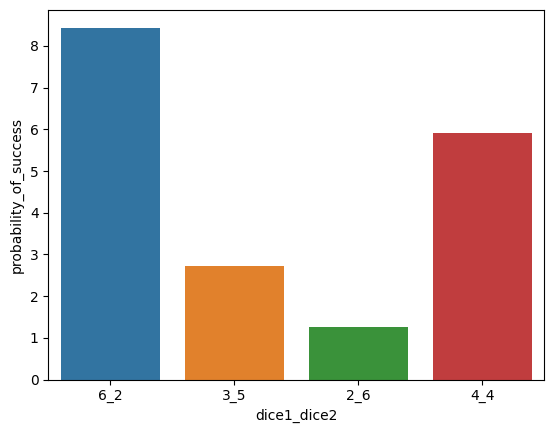

'\nGreat work! This is an example of sampling from correlated inputs in simple distributions. What about more complicated probability distributions? Can we sample from them? What if we are interested in more than one variable? Great questions—we are going to learn how to do these things in the next chapter!\n'

In [17]:
# exercise 07

"""
Paired dice simulation

Similar to the example in the lesson, you will roll two dice from two bags, and each bag contains three biased dice.

bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

The difference is that the dice in the two bags are paired: if you pick the second die in bag1, you will also pick the second die in bag2. In each trial:

    You pick one pair of dice from the two bags randomly and roll them
    Success occurs if the points on dice1 and dice2 add up to eight; otherwise, failure

Your task is to complete the for-loop in the roll_paired_biased_dice() function and to use this function to calculate the probabilities of success for each unique combination of points on dice1 and dice2.

The following have been imported for you: random, numpy as np, pandas as pd, seaborn as sns and matplotlib.pyplot as plt.
"""

# Instructions

"""


    Use random.randint() to obtain the dice indices (each a number from 0 to 5).
    Use bag_index followed by the correct dice_index to sample a pair of dice from bag1 and bag2.
---


    Run the simulation 10,000 times, assigning the results DataFrame to df_results so that it can be plotted; use a seed of 1231.

"""

# solution

import pandas as pd

bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

def roll_paired_biased_dice(n, seed=1231):
    results = {}
    random.seed(seed)
    for i in range(n):
        bag_index = random.randint(0, 1)
        dice_index1 = random.randint(0, 5)
        dice_index2 = random.randint(0, 5)
        point1 = bag1[bag_index][dice_index1]
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1, point2)
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({"dice1_dice2":results.keys(),
		"probability_of_success":np.array(list(results.values()))*100.0/n}))

# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000)
sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)
plt.show()

#----------------------------------#

# Conclusion

"""
Great work! This is an example of sampling from correlated inputs in simple distributions. What about more complicated probability distributions? Can we sample from them? What if we are interested in more than one variable? Great questions—we are going to learn how to do these things in the next chapter!
"""